In [1]:
import os
import sys
import numpy as np
np.set_printoptions(suppress=True, linewidth=200)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.13, rc={"lines.linewidth": 3.5})
plt.rcParams['axes.formatter.useoffset'] = True

os.chdir("./src")
from utils_pde_shock_elasticity import computeElas
os.chdir("..")

In [7]:
def return_solution(shock_expo, seed, chiUnderline, a_e, a_h, gamma_e, gamma_h, psi_e, psi_h, delta_e, delta_h, lambda_d, nu,n_layers,units,iter_num, points_size,penalization, action_name):
        
        wMin = 0.01
        wMax = 0.99

        nWealth           = 180
        nZ                = 30
        nV                = 30
        
        wMin_t, wMax_t = [str("{:0.3f}".format(param)).replace('.', '', 1)  for param in [wMin, wMax]]
        domain_folder = 'nW_' + str(nWealth) + '_nZ_' + str(nZ) + '_nV_' + str(nV) + '_wMin_' + wMin_t + '_wMax_' + wMax_t

        parameter_list    = [chiUnderline, a_e, a_h, gamma_e, gamma_h, psi_e, psi_h, delta_e, delta_h, lambda_d, nu]
        chiUnderline, a_e, a_h, gamma_e, gamma_h, psi_e, psi_h, delta_e, delta_h, lambda_d, nu = [str("{:0.3f}".format(param)).replace('.', '', 1)  for param in parameter_list]
        model_folder = 'chiUnderline_' + chiUnderline + '_a_e_' + a_e + '_a_h_' + a_h  + '_gamma_e_' + gamma_e + '_gamma_h_' + gamma_h + '_rho_e_' + psi_e + '_rho_h_' + psi_h + '_delta_e_' + delta_e + '_delta_h_' + delta_h + '_lambda_d_' + lambda_d + '_nu_' + nu
        layer_folder =  'seed_' + str(seed) + '_n_layers_' + str(n_layers) + '_units_' + str(units) +'_points_size_' + str(points_size) + '_iter_num_' + str(iter_num) + '_penalization_' + str(penalization)

        workdir = os.getcwd()
        outputdir = workdir + '/output/' + action_name + '/' + shock_expo + '/'+ domain_folder + '/' + model_folder + '/' + layer_folder + '/'
        print(outputdir)

        eva_V_10 = np.load(outputdir + 'eva_V_10.npz')
        eva_V_50 = np.load(outputdir + 'eva_V_50.npz')
        eva_V_90 = np.load(outputdir + 'eva_V_90.npz')

        print('HJBE_validation_MSE: ', np.load(outputdir + 'HJBE_validation_MSE.npy'))
        print('HJBH_validation_MSE: ', np.load(outputdir + 'HJBH_validation_MSE.npy'))
        print('kappa_validation_MSE: ', np.load(outputdir + 'kappa_validation_MSE.npy'))

        try:
                elasticity_logw = np.load(outputdir + 'elasticity_logw.npz', allow_pickle=True)
        except:
            elasticity_logw = None
        try:
            uncertaintye_priceelas = np.load(outputdir + 'uncertaintye_priceelas.npz', allow_pickle=True)
        except:
                uncertaintye_priceelas = None
        try:
            uncertaintyh_priceelas = np.load(outputdir + 'uncertaintyh_priceelas.npz', allow_pickle=True)
        except:
                uncertaintyh_priceelas = None

        W = np.load(outputdir + 'W_NN.npy')
        W = pd.DataFrame(W, columns = ['W'])
        Z = np.load(outputdir + 'Z_NN.npy')
        Z = pd.DataFrame(Z, columns = ['Z'])
        V = np.load(outputdir + 'V_NN.npy')
        V = pd.DataFrame(V, columns = ['V'])

        dent = np.load(outputdir + 'dent_NN.npy')
        dent = pd.DataFrame(dent, columns = ['dent'])
        dent = pd.concat([W,Z,V,dent['dent']], axis=1)
        dentW = dent.groupby('W').sum()['dent']
        dentV = dent.groupby('V').sum()['dent']

        try:
                elasticities_W_percentile_005 = np.load(outputdir + 'elasticities_W_percentile_0.05.npz', allow_pickle=True)
        except:
                elasticities_W_percentile_005 = None
        try:
                elasticities_W_percentile_01 = np.load(outputdir + 'elasticities_W_percentile_0.1.npz', allow_pickle=True)
        except:
                elasticities_W_percentile_01 = None
        try:
                elasticities_W_percentile_05 = np.load(outputdir + 'elasticities_W_percentile_0.5.npz', allow_pickle=True)
        except:
                elasticities_W_percentile_05 = None

        return {'eva_V_10':eva_V_10, 'eva_V_50':eva_V_50, 'eva_V_90':eva_V_90, 'dentW':dentW, 'dentV':dentV,
                'W':W, 'Z':Z, 'V':V, 'elasticity_logw':elasticity_logw,  'uncertaintye_priceelas':uncertaintye_priceelas, 'uncertaintyh_priceelas':uncertaintyh_priceelas,\
                'elasticities_W_percentile_005':elasticities_W_percentile_005, 'elasticities_W_percentile_01':elasticities_W_percentile_01, 'elasticities_W_percentile_05':elasticities_W_percentile_05}


In [8]:
modelRF_lower = return_solution(shock_expo = 'lower_triangular', seed = 256, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelRF_upper = return_solution(shock_expo = 'upper_triangular', seed = 256, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelSG_lower = return_solution(shock_expo = 'lower_triangular', seed = 256, chiUnderline = 0.2, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelSG_upper = return_solution(shock_expo = 'upper_triangular', seed = 256, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelPR_lower = return_solution(shock_expo = 'lower_triangular', seed = 256, chiUnderline = 0.00001, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelPR_upper = return_solution(shock_expo = 'upper_triangular', seed = 256, chiUnderline = 0.00001, a_e = 0.0922, a_h = 0.0, gamma_e = 4.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')

modelRF_lower_gammae_3 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.0, gamma_e = 3.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelRF_lower_gammae_5 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.0, gamma_e = 5.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')

modelSG_lower_gammae_3 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 0.2, a_e = 0.0922, a_h = 0.0, gamma_e = 3.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelSG_lower_gammae_5 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 0.2, a_e = 0.0922, a_h = 0.0, gamma_e = 5.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')

modelPR_lower_gammae_3 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 0.00001, a_e = 0.0922, a_h = 0.0, gamma_e = 3.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')
modelPR_lower_gammae_5 = return_solution(shock_expo = 'lower_triangular',seed = 256, chiUnderline = 0.00001, a_e = 0.0922, a_h = 0.0, gamma_e = 5.0, gamma_h = 8.0, psi_e = 1.0, psi_h = 1.0, delta_e = 0.0115, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, n_layers = 2, units = 16, iter_num = 5, points_size = 10, penalization = 10000, action_name = 'neural_net')


/project/lhansen/macrofinance/heterogenous_agents_with_frictions_NN/output/neural_net/lower_triangular/nW_180_nZ_30_nV_30_wMin_0010_wMax_0990/chiUnderline_1000_a_e_0092_a_h_0000_gamma_e_4000_gamma_h_8000_rho_e_1000_rho_h_1000_delta_e_0011_delta_h_0010_lambda_d_0000_nu_0100/seed_256_n_layers_2_units_16_points_size_10_iter_num_5_penalization_10000/
HJBE_validation_MSE:  2.8413337653444003e-05
HJBH_validation_MSE:  2.0985705160093152e-05
kappa_validation_MSE:  8.453717859970984e-13
/project/lhansen/macrofinance/heterogenous_agents_with_frictions_NN/output/neural_net/upper_triangular/nW_180_nZ_30_nV_30_wMin_0010_wMax_0990/chiUnderline_1000_a_e_0092_a_h_0000_gamma_e_4000_gamma_h_8000_rho_e_1000_rho_h_1000_delta_e_0011_delta_h_0010_lambda_d_0000_nu_0100/seed_256_n_layers_2_units_16_points_size_10_iter_num_5_penalization_10000/
HJBE_validation_MSE:  2.442589871103974e-05
HJBH_validation_MSE:  2.0688856497623123e-05
kappa_validation_MSE:  8.935164172208854e-13
/project/lhansen/macrofinance/het

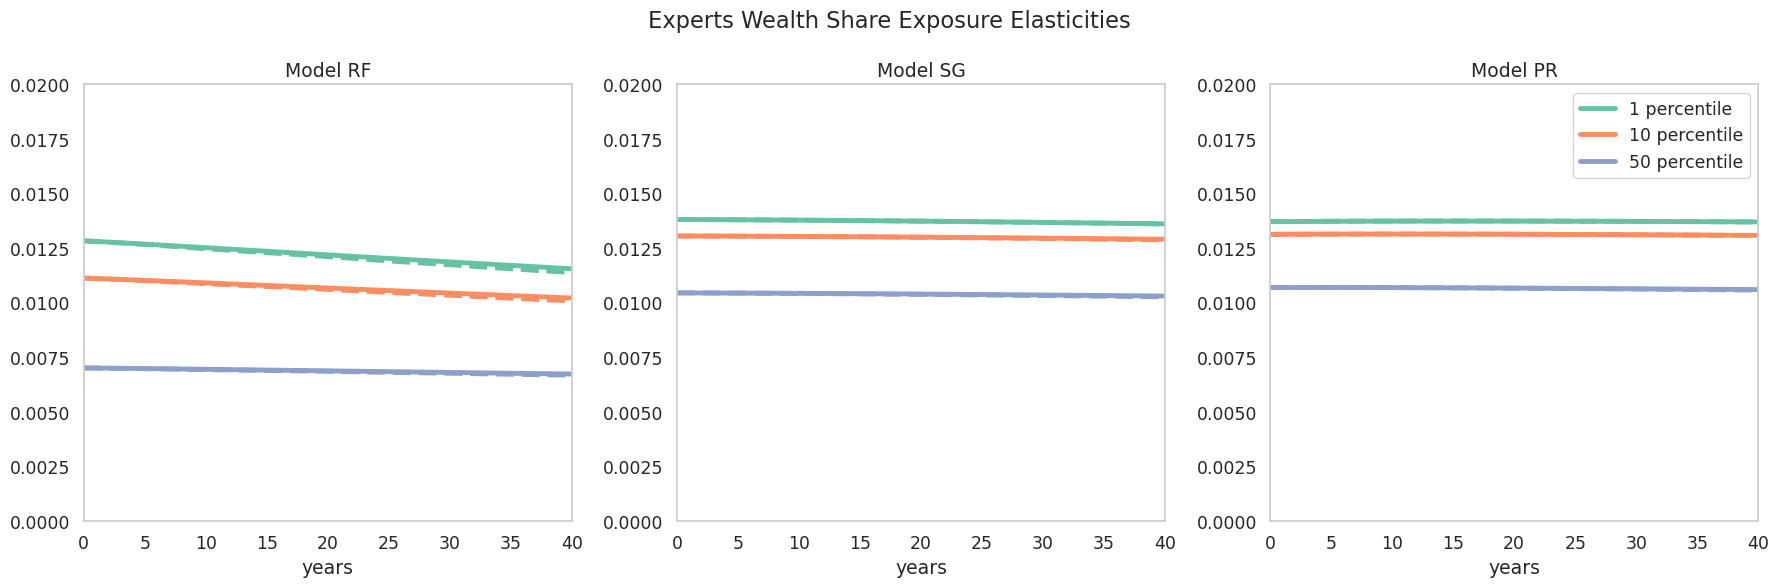

In [4]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
sns.lineplot(modelRF_lower['elasticity_logw']['exposure_elasticity'].item().firstType[0,0,:], ax = axes[0], color = set2_colors[0])
sns.lineplot(modelRF_lower['elasticity_logw']['exposure_elasticity'].item().firstType[1,0,:], ax = axes[0], color = set2_colors[1])
sns.lineplot(modelRF_lower['elasticity_logw']['exposure_elasticity'].item().firstType[2,0,:], ax = axes[0], color = set2_colors[2])

sns.lineplot(modelRF_lower['elasticities_W_percentile_005']['exposure_elasticity'], ax = axes[0],color = set2_colors[0],ls = '--')
sns.lineplot(modelRF_lower['elasticities_W_percentile_01']['exposure_elasticity'], ax = axes[0],color = set2_colors[1],ls = '--')
sns.lineplot(modelRF_lower['elasticities_W_percentile_05']['exposure_elasticity'], ax = axes[0],color = set2_colors[2],ls = '--')
axes[0].set_title(r'Model RF')

sns.lineplot(modelSG_lower['elasticity_logw']['exposure_elasticity'].item().firstType[0,0,:], ax = axes[1],color = set2_colors[0])
sns.lineplot(modelSG_lower['elasticity_logw']['exposure_elasticity'].item().firstType[1,0,:], ax = axes[1],color = set2_colors[1])
sns.lineplot(modelSG_lower['elasticity_logw']['exposure_elasticity'].item().firstType[2,0,:], ax = axes[1],color = set2_colors[2])

sns.lineplot(modelSG_lower['elasticities_W_percentile_005']['exposure_elasticity'], ax = axes[1],color = set2_colors[0],ls = '--')
sns.lineplot(modelSG_lower['elasticities_W_percentile_01']['exposure_elasticity'], ax = axes[1],color = set2_colors[1],ls = '--')
sns.lineplot(modelSG_lower['elasticities_W_percentile_05']['exposure_elasticity'], ax = axes[1],color = set2_colors[2],ls = '--')
axes[1].set_title(r'Model SG')

sns.lineplot(modelPR_lower['elasticity_logw']['exposure_elasticity'].item().firstType[0,0,:], ax = axes[2], label = '1 percentile',color = set2_colors[0],ls = '-')
sns.lineplot(modelPR_lower['elasticity_logw']['exposure_elasticity'].item().firstType[1,0,:], ax = axes[2], label = '10 percentile',color = set2_colors[1],ls = '-')
sns.lineplot(modelPR_lower['elasticity_logw']['exposure_elasticity'].item().firstType[2,0,:], ax = axes[2], label = '50 percentile',color = set2_colors[2],ls = '-')

sns.lineplot(modelPR_lower['elasticities_W_percentile_005']['exposure_elasticity'], ax = axes[2],color = set2_colors[0],ls = '--')
sns.lineplot(modelPR_lower['elasticities_W_percentile_01']['exposure_elasticity'], ax = axes[2],color = set2_colors[1],ls = '--')
sns.lineplot(modelPR_lower['elasticities_W_percentile_05']['exposure_elasticity'], ax = axes[2],color = set2_colors[2],ls = '--')
axes[2].set_title(r'Model PR')

for ax in axes.flatten():
    ax.set_xlim(0,40)
    ax.grid(False)
    ax.set_ylim([0,0.02])
    ax.set_xlabel('years')
plt.suptitle('Experts Wealth Share Exposure Elasticities')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

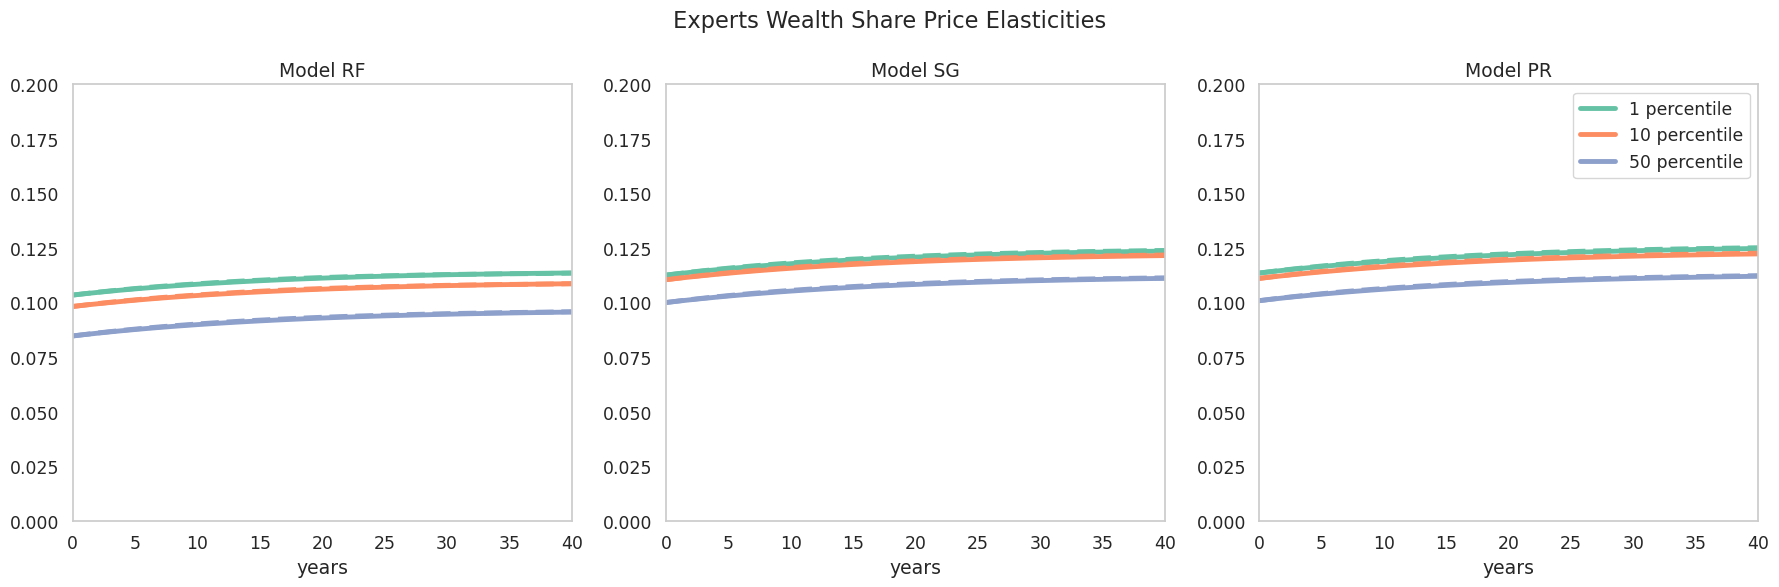

In [5]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
sns.lineplot(modelRF_lower['elasticity_logw']['price_elasticity'].item().firstType[0,0,:], ax = axes[0], color = set2_colors[0])
sns.lineplot(modelRF_lower['elasticity_logw']['price_elasticity'].item().firstType[1,0,:], ax = axes[0], color = set2_colors[1])
sns.lineplot(modelRF_lower['elasticity_logw']['price_elasticity'].item().firstType[2,0,:], ax = axes[0], color = set2_colors[2])

sns.lineplot(modelRF_lower['elasticities_W_percentile_005']['price_elasticity'], ax = axes[0],color = set2_colors[0],ls = '--')
sns.lineplot(modelRF_lower['elasticities_W_percentile_01']['price_elasticity'], ax = axes[0],color = set2_colors[1],ls = '--')
sns.lineplot(modelRF_lower['elasticities_W_percentile_05']['price_elasticity'], ax = axes[0],color = set2_colors[2],ls = '--')
axes[0].set_title(r'Model RF')

sns.lineplot(modelSG_lower['elasticity_logw']['price_elasticity'].item().firstType[0,0,:], ax = axes[1],color = set2_colors[0])
sns.lineplot(modelSG_lower['elasticity_logw']['price_elasticity'].item().firstType[1,0,:], ax = axes[1],color = set2_colors[1])
sns.lineplot(modelSG_lower['elasticity_logw']['price_elasticity'].item().firstType[2,0,:], ax = axes[1],color = set2_colors[2])

sns.lineplot(modelSG_lower['elasticities_W_percentile_005']['price_elasticity'], ax = axes[1],color = set2_colors[0],ls = '--')
sns.lineplot(modelSG_lower['elasticities_W_percentile_01']['price_elasticity'], ax = axes[1],color = set2_colors[1],ls = '--')
sns.lineplot(modelSG_lower['elasticities_W_percentile_05']['price_elasticity'], ax = axes[1],color = set2_colors[2],ls = '--')
axes[1].set_title(r'Model SG')

sns.lineplot(modelPR_lower['elasticity_logw']['price_elasticity'].item().firstType[0,0,:], ax = axes[2], label = '1 percentile',color = set2_colors[0],ls = '-')
sns.lineplot(modelPR_lower['elasticity_logw']['price_elasticity'].item().firstType[1,0,:], ax = axes[2], label = '10 percentile',color = set2_colors[1],ls = '-')
sns.lineplot(modelPR_lower['elasticity_logw']['price_elasticity'].item().firstType[2,0,:], ax = axes[2], label = '50 percentile',color = set2_colors[2],ls = '-')

sns.lineplot(modelPR_lower['elasticities_W_percentile_005']['price_elasticity'], ax = axes[2],color = set2_colors[0],ls = '--')
sns.lineplot(modelPR_lower['elasticities_W_percentile_01']['price_elasticity'], ax = axes[2],color = set2_colors[1],ls = '--')
sns.lineplot(modelPR_lower['elasticities_W_percentile_05']['price_elasticity'], ax = axes[2],color = set2_colors[2],ls = '--')
axes[2].set_title(r'Model PR')

for ax in axes.flatten():
    ax.set_xlim(0,40)
    ax.grid(False)
    ax.set_ylim([0,0.2])
    ax.set_xlabel('years')
plt.suptitle('Experts Wealth Share Price Elasticities')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

In [10]:
colors = ['#1f77b4', '#d62728', 'green']

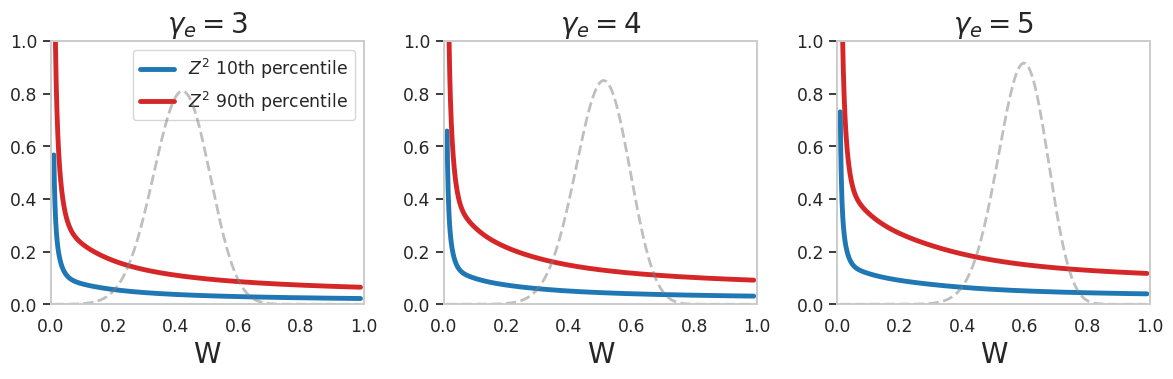

In [19]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
W_dense = np.unique(modelRF_lower['eva_V_10']['W'])
W_sparse = np.unique(modelRF_lower['W'].values)
sns.lineplot(x = W_dense, y = modelRF_lower_gammae_3['eva_V_10']['PiE_NN'][:,0], ax = axes[0], label = '$Z^2$ 10th percentile',color=colors[0])
sns.lineplot(x = W_dense, y = modelRF_lower_gammae_3['eva_V_90']['PiE_NN'][:,0], ax = axes[0], label = '$Z^2$ 90th percentile',color=colors[1])
axes[0].legend()
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelRF_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.03])
axes[0].set_title(r'$\gamma_e = 3$', fontsize=20)

sns.lineplot(x = W_dense, y = modelRF_lower['eva_V_10']['PiE_NN'][:,0], ax = axes[1],color=colors[0])
sns.lineplot(x = W_dense, y = modelRF_lower['eva_V_90']['PiE_NN'][:,0], ax = axes[1],color=colors[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelRF_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.03])
axes[1].set_title(r'$\gamma_e = 4$', fontsize=20)

sns.lineplot(x = W_dense, y = modelRF_lower_gammae_5['eva_V_10']['PiE_NN'][:,0], ax = axes[2],color=colors[0])
sns.lineplot(x = W_dense, y = modelRF_lower_gammae_5['eva_V_90']['PiE_NN'][:,0], ax = axes[2],color=colors[1])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelRF_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.03])
axes[2].set_title(r'$\gamma_e = 5$', fontsize=20)

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.0])
    ax.set_xlabel('W', fontsize=20)
# plt.suptitle('Experts capital risk prices')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.savefig("plots/figure_10.pdf")
plt.show()

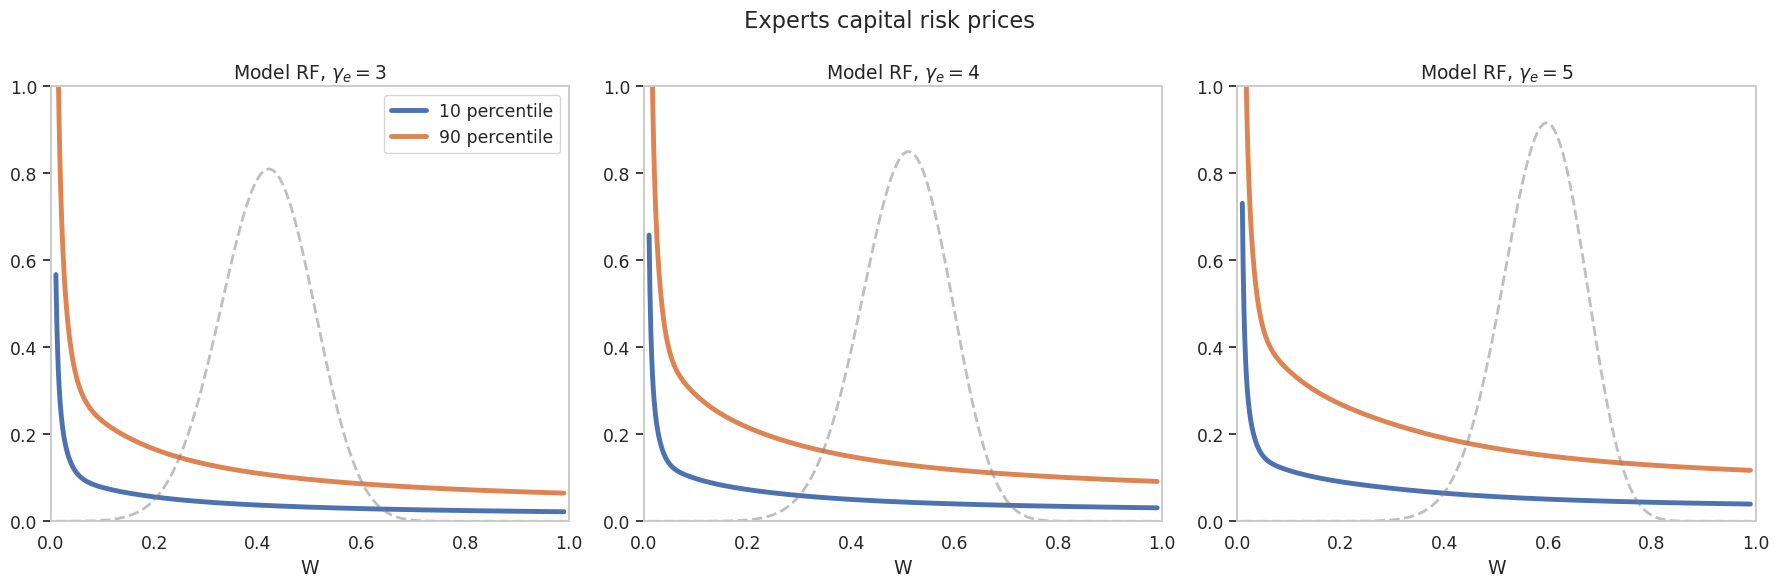

In [14]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
W_dense = np.unique(modelRF_lower['eva_V_10']['W'])
W_sparse = np.unique(modelRF_lower['W'].values)
sns.lineplot(x = W_dense, y = modelRF_lower_gammae_3['eva_V_10']['PiE_NN'][:,0], ax = axes[0], label = '10 percentile')
sns.lineplot(x = W_dense, y = modelRF_lower_gammae_3['eva_V_90']['PiE_NN'][:,0], ax = axes[0], label = '90 percentile')
axes[0].legend()
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelRF_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.03])
axes[0].set_title(r'Model RF, $\gamma_e = 3$')

sns.lineplot(x = W_dense, y = modelRF_lower['eva_V_10']['PiE_NN'][:,0], ax = axes[1])
sns.lineplot(x = W_dense, y = modelRF_lower['eva_V_90']['PiE_NN'][:,0], ax = axes[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelRF_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.03])
axes[1].set_title(r'Model RF, $\gamma_e = 4$')

sns.lineplot(x = W_dense, y = modelRF_lower_gammae_5['eva_V_10']['PiE_NN'][:,0], ax = axes[2])
sns.lineplot(x = W_dense, y = modelRF_lower_gammae_5['eva_V_90']['PiE_NN'][:,0], ax = axes[2])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelRF_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.03])
axes[2].set_title(r'Model RF, $\gamma_e = 5$')

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.0])
    ax.set_xlabel('W')
plt.suptitle('Experts capital risk prices')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

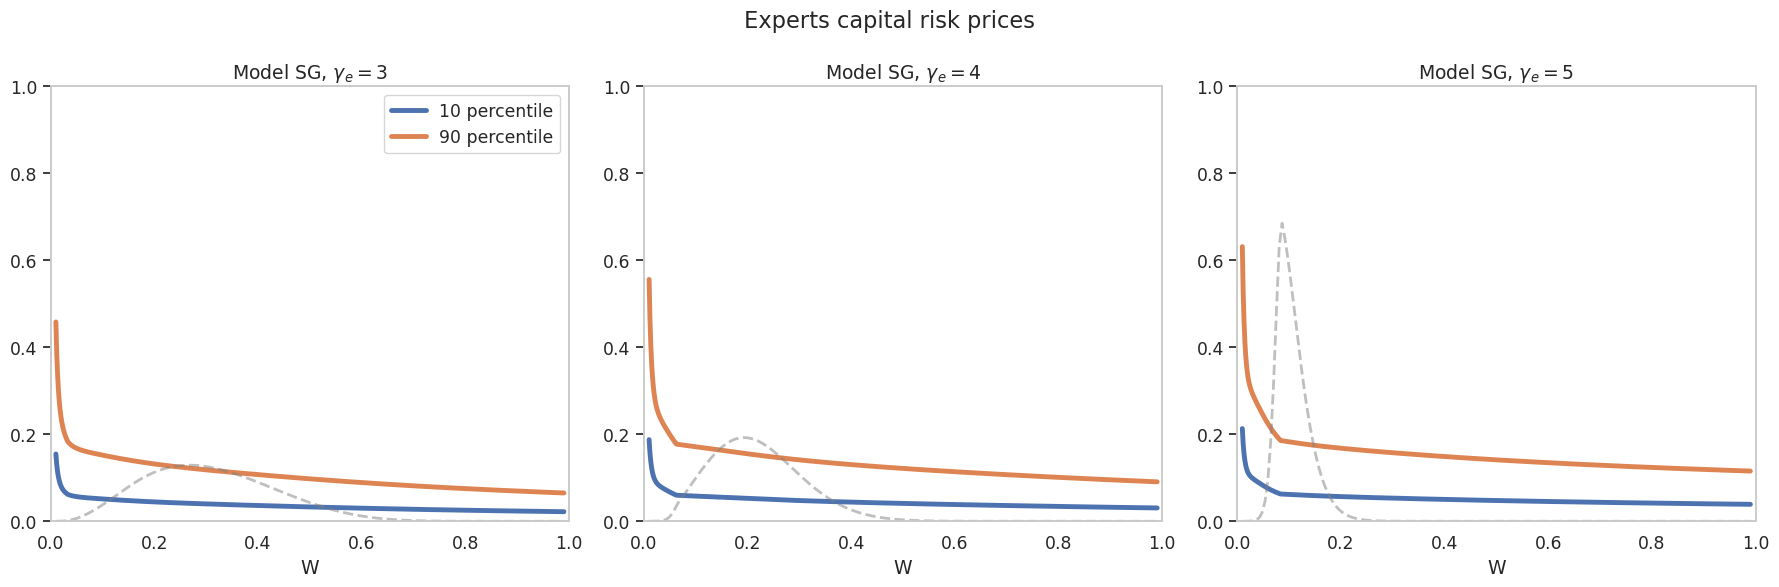

In [7]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
W_dense = np.unique(modelSG_lower['eva_V_10']['W'])
W_sparse = np.unique(modelSG_lower['W'].values)
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_3['eva_V_10']['PiE_NN'][:,0], ax = axes[0], label = '10 percentile')
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_3['eva_V_90']['PiE_NN'][:,0], ax = axes[0], label = '90 percentile')
axes[0].legend()    
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[0].set_title(r'Model SG, $\gamma_e = 3$')

sns.lineplot(x = W_dense, y = modelSG_lower['eva_V_10']['PiE_NN'][:,0], ax = axes[1])
sns.lineplot(x = W_dense, y = modelSG_lower['eva_V_90']['PiE_NN'][:,0], ax = axes[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[1].set_title(r'Model SG, $\gamma_e = 4$')

sns.lineplot(x = W_dense, y = modelSG_lower_gammae_5['eva_V_10']['PiE_NN'][:,0], ax = axes[2])
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_5['eva_V_90']['PiE_NN'][:,0], ax = axes[2])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[2].set_title(r'Model SG, $\gamma_e = 5$')

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.0])
    ax.set_xlabel('W')
plt.suptitle('Experts capital risk prices')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

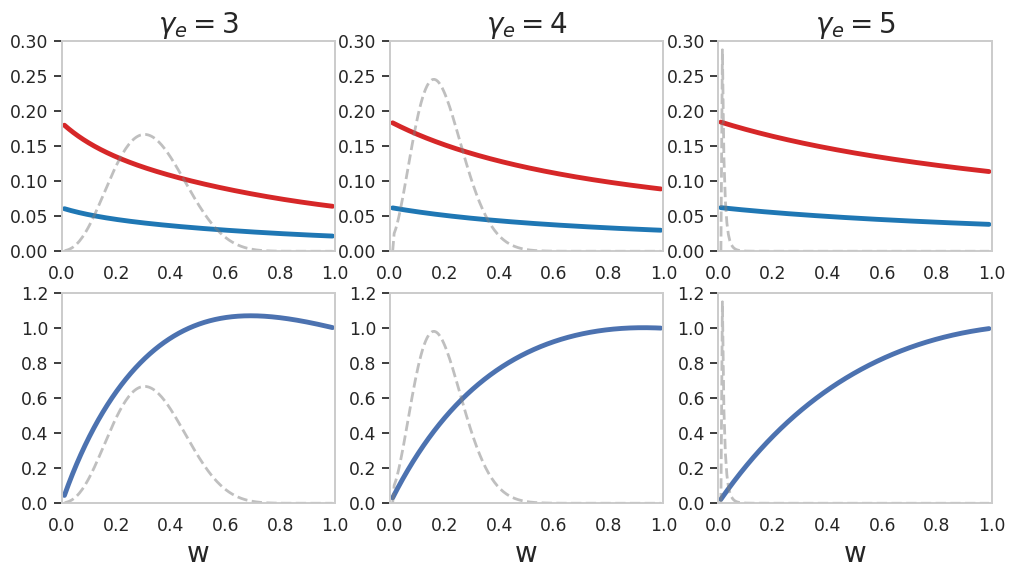

In [20]:
## Figure 12
fig, axes = plt.subplots(2,3, figsize=(12, 6))
W_large = modelPR_lower['eva_V_50']['W']
W_small = np.unique(modelPR_lower['W'].values)


sns.lineplot(x=W_large, y=modelPR_lower_gammae_3['eva_V_10']['PiE_NN'][:,0], ax = axes[0,0], label=r'$Z^2$ 10th percentile', color='#1f77b4')
sns.lineplot(x=W_large, y=modelPR_lower_gammae_3['eva_V_90']['PiE_NN'][:,0], ax = axes[0,0], label=r'$Z^2$ 90th percentile', color='#d62728')
ax2 = axes[0,0].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[0,0].set_title("$\gamma_e = 3$", fontsize=20)
axes[0,0].set_ylim([-0.01,2.3])
axes[0,0].legend(prop={'size': 14})
ax2.set_ylim([0,0.2])
ax2.set_ylim([0,0.03])

sns.lineplot(x=W_large, y=modelPR_lower['eva_V_10']['PiE_NN'][:,0], ax = axes[0,1], color='#1f77b4')
sns.lineplot(x=W_large, y=modelPR_lower['eva_V_90']['PiE_NN'][:,0], ax = axes[0,1], color='#d62728')
ax2 = axes[0,1].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[0,1].set_title("$\gamma_e = 4$", fontsize=20)
axes[0,1].set_ylim([-0.01,2.3])
ax2.set_ylim([0,0.03])


sns.lineplot(x=W_large, y=modelPR_lower_gammae_5['eva_V_10']['PiE_NN'][:,0], ax = axes[0,2], color='#1f77b4')
sns.lineplot(x=W_large, y=modelPR_lower_gammae_5['eva_V_90']['PiE_NN'][:,0], ax = axes[0,2], color='#d62728')
ax2 = axes[0,2].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[0,2].set_title("$\gamma_e = 5$", fontsize=20)
axes[0,2].set_ylim([-0.01,2.3])
ax2.set_ylim([0,0.5])

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim(0,0.3)

sns.lineplot(x=W_large, y=modelPR_lower_gammae_3['eva_V_50']['chi_NN'][:,0], ax = axes[1,0])
ax2 = axes[1,0].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[1,0].set_ylim([0,1.1])
axes[1,0].set_xlabel('w', fontsize=20)
ax2.set_ylim([0,0.03])


sns.lineplot(x=W_large, y=modelPR_lower['eva_V_50']['chi_NN'][:,0], ax = axes[1,1])
ax2 = axes[1,1].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[1,1].set_ylim([0,1.1])
axes[1,1].set_xlabel('w', fontsize=20)
ax2.set_ylim([0,0.03])

sns.lineplot(x=W_large, y=modelPR_lower_gammae_5['eva_V_50']['chi_NN'][:,0], ax = axes[1,2])
ax2 = axes[1,2].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[1,2].set_ylim([0,1.1])
axes[1,2].set_xlabel('w', fontsize=20)
ax2.set_ylim([0,0.5])
for ax in axes.flatten()[3:]:
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim(0,1.2)

axes[0,0].get_legend().remove()

plt.savefig("./plots/figure_11.pdf",transparent=False)
plt.show()


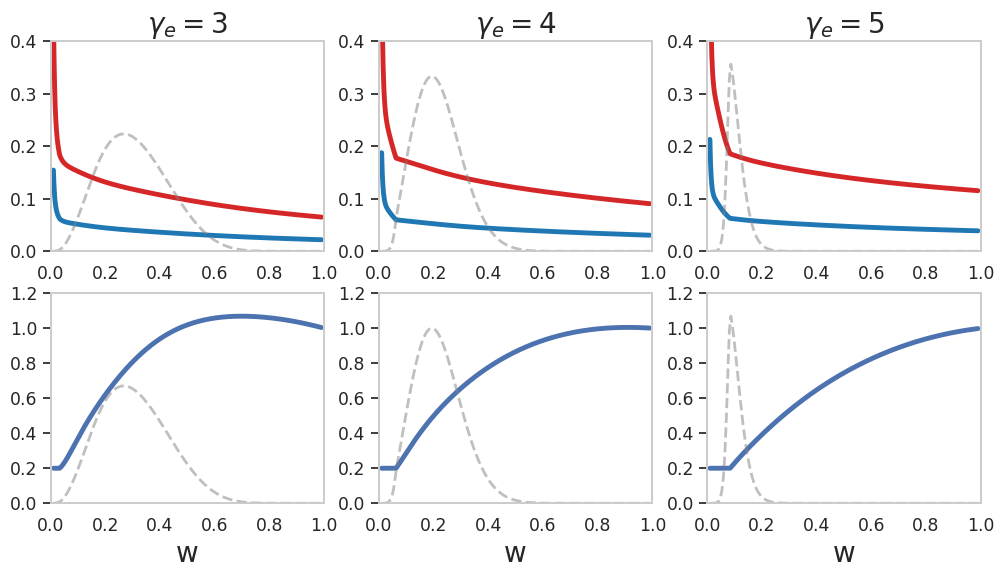

In [26]:
## Figure 12
fig, axes = plt.subplots(2,3, figsize=(12, 6))
W_large = modelSG_lower['eva_V_50']['W']
W_small = np.unique(modelSG_lower['W'].values)


sns.lineplot(x=W_large, y=modelSG_lower_gammae_3['eva_V_10']['PiE_NN'][:,0], ax = axes[0,0], label=r'$Z^2$ 10th percentile', color='#1f77b4')
sns.lineplot(x=W_large, y=modelSG_lower_gammae_3['eva_V_90']['PiE_NN'][:,0], ax = axes[0,0], label=r'$Z^2$ 90th percentile', color='#d62728')
ax2 = axes[0,0].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[0,0].set_title("$\gamma_e = 3$", fontsize=20)
axes[0,0].set_ylim([-0.01,2.3])
axes[0,0].legend(prop={'size': 14})
ax2.set_ylim([0,0.2])
ax2.set_ylim([0,0.03])

sns.lineplot(x=W_large, y=modelSG_lower['eva_V_10']['PiE_NN'][:,0], ax = axes[0,1], color='#1f77b4')
sns.lineplot(x=W_large, y=modelSG_lower['eva_V_90']['PiE_NN'][:,0], ax = axes[0,1], color='#d62728')
ax2 = axes[0,1].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[0,1].set_title("$\gamma_e = 4$", fontsize=20)
axes[0,1].set_ylim([-0.01,2.3])
ax2.set_ylim([0,0.03])


sns.lineplot(x=W_large, y=modelSG_lower_gammae_5['eva_V_10']['PiE_NN'][:,0], ax = axes[0,2], color='#1f77b4')
sns.lineplot(x=W_large, y=modelSG_lower_gammae_5['eva_V_90']['PiE_NN'][:,0], ax = axes[0,2], color='#d62728')
ax2 = axes[0,2].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[0,2].set_title("$\gamma_e = 5$", fontsize=20)
axes[0,2].set_ylim([-0.01,2.3])
ax2.set_ylim([0,0.1])

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim(0,0.4)

sns.lineplot(x=W_large, y=modelSG_lower_gammae_3['eva_V_50']['chi_NN'][:,0], ax = axes[1,0])
ax2 = axes[1,0].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[1,0].set_ylim([0,1.1])
axes[1,0].set_xlabel('w', fontsize=20)
ax2.set_ylim([0,0.03])


sns.lineplot(x=W_large, y=modelSG_lower['eva_V_50']['chi_NN'][:,0], ax = axes[1,1])
ax2 = axes[1,1].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[1,1].set_ylim([0,1.1])
axes[1,1].set_xlabel('w', fontsize=20)
ax2.set_ylim([0,0.03])

sns.lineplot(x=W_large, y=modelSG_lower_gammae_5['eva_V_50']['chi_NN'][:,0], ax = axes[1,2])
ax2 = axes[1,2].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
axes[1,2].set_ylim([0,1.1])
axes[1,2].set_xlabel('w', fontsize=20)
ax2.set_ylim([0,0.1])
for ax in axes.flatten()[3:]:
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim(0,1.2)

axes[0,0].get_legend().remove()

plt.savefig("./plots/figure_12.pdf",transparent=False)
plt.show()


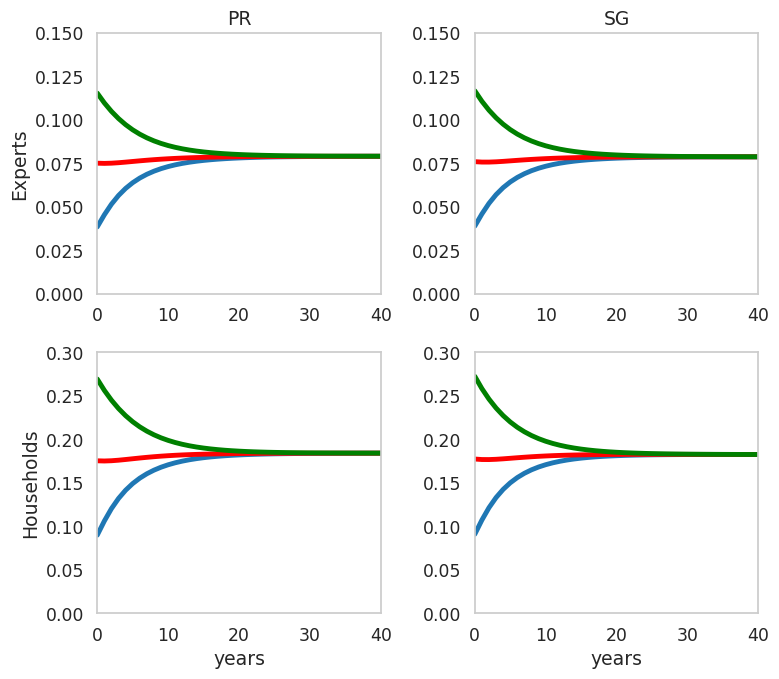

In [42]:
fig, axes = plt.subplots(2,2, figsize=(8, 7))
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[0,0],color='#1f77b4')
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[0,0],color='red')
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[0,0],color='green')
axes[0,0].set_title("PR")
axes[0,0].set_ylabel("Experts")
axes[0,0].set_ylim([0,0.15])

sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[0,1],color='#1f77b4')
sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[0,1],color='red')
sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[0,1],color='green')
axes[0,1].set_title("SG")
axes[0,1].set_ylim([0,0.15])

sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[1,0],color='#1f77b4')
sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[1,0],color='red')
sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[1,0],color='green')
axes[1,0].set_ylabel("Households")
axes[1,0].set_xlabel("years")
axes[1,0].set_ylim([0,0.3])

sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[1,1],color='#1f77b4')
sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[1,1],color='red')
sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[1,1],color='green')
axes[1,1].set_xlabel("years")
axes[1,1].set_ylim([0,0.3])

for ax in axes.flatten():
    ax.set_xlim(0,40)
    ax.grid(False)

# plt.suptitle('Uncertainty Prices Term Structure')
plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.savefig("plots/figure_15.pdf")
plt.show()


In [32]:
def return_fdm_solution(shock_expo, dt, nW, chiUnderline, a_e, a_h, gamma_e, gamma_h, rho_e, rho_h, delta_e, delta_h, lambda_d, nu, action_name, nZ):

    rho_e_t = "{:0.3f}".format(rho_e)
    rho_h_t = "{:0.3f}".format(rho_h)
    gamma_e_t = "{:0.3f}".format(gamma_e)
    gamma_h_t = "{:0.3f}".format(gamma_h)
    a_e_t = "{:0.3f}".format(a_e)
    a_h_t = "{:0.3f}".format(a_h)
    chiUnderline_t = "{:0.3f}".format(chiUnderline)
    delta_e_t = "{:0.3f}".format(delta_e)
    delta_h_t = "{:0.3f}".format(delta_h)
    lambda_d_t = "{:0.3f}".format(lambda_d)
    nu_t = "{:0.3f}".format(nu)

    folder_name = ('../heterogenous_agents_with_frictions_FDM/output/' + action_name + '/' + shock_expo + '/dt_'+str(dt)+'/nW_'+str(nW)+'_nZ_'+str(nZ)+'/chiUnderline_' + chiUnderline_t + '/a_e_' + a_e_t + '_a_h_' + a_h_t  + '/gamma_e_' + gamma_e_t + '_gamma_h_' + gamma_h_t + '/rho_e_' + rho_e_t + '_rho_h_' + rho_h_t + '/delta_e_' + delta_e_t + '_delta_h_' + delta_h_t + '/lambda_d_' + lambda_d_t + '_nu_' + nu_t)

    def extract_lines_from_file(file_path, phrase):
        extracted_lines = []
        with open(file_path, 'r') as file:
            for line in file:
                if line.startswith(phrase):
                    extracted_lines.append(line.strip())
        return extracted_lines

    file_path = folder_name + '/log.txt' 
    phrase = 'END OF ITERATIONS:'
    extracted_lines = extract_lines_from_file(file_path, phrase)
    try:
        print('rho_e: ', rho_e, ', rho_h: ', rho_h, ', gamma_e: ', gamma_e, ', gamma_h: ', gamma_h, ', a_e: ', a_e, ', a_h: ', a_h, ', chiUnderline: ', chiUnderline, ', results:', extracted_lines[0])
    except:
        print('rho_e: ', rho_e, ', rho_h: ', rho_h, ', gamma_e: ', gamma_e, ', gamma_h: ', gamma_h, ', a_e: ', a_e, ', a_h: ', a_h, ', chiUnderline: ', chiUnderline, ', running in progress')
    
    def read_dat(filename):
        with open(folder_name + '/'+filename+'.dat', 'r') as file:
            data = [float(line.strip()) for line in file if line.strip()]
        return pd.DataFrame(data, columns=[filename])
    
    W = read_dat('W')
    Z = read_dat('Z')
    
    with open(folder_name + '/PiE_final_TFP.pkl' , 'rb') as file:
        PiE_final_TFP = pickle.load(file)
    with open(folder_name + '/kappa_final.pkl' , 'rb') as file:
        kappa_final = pickle.load(file)

    dents = pd.read_csv(folder_name + '/dent.txt',names = ['dent'])
    dents = pd.concat([W,Z,dents], axis=1)
    dents = dents.groupby('W').sum()['dent']

    try:
        elasticities_W0 = np.load(folder_name+'/elasticity_W_0.npz',allow_pickle=True)
        elasticities_W1 = np.load(folder_name+'/elasticity_W_1.npz',allow_pickle=True)
        elasticities_W2 = np.load(folder_name+'/elasticity_W_2.npz',allow_pickle=True)
    except:
        elasticities_W0 = None
        elasticities_W1 = None
        elasticities_W2 = None
    
    return {'W':W, 'Z':Z, 'PiE_final_TFP':PiE_final_TFP, 'dents':dents, 'kappa_final':kappa_final, 'elasticities_W0':elasticities_W0, 'elasticities_W1':elasticities_W1, 'elasticities_W2':elasticities_W2}
            


In [34]:
import pickle

In [35]:
model_070_lower_triangular = return_fdm_solution(shock_expo = 'lower_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.070, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')
model_080_lower_triangular = return_fdm_solution(shock_expo = 'lower_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.080, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')
model_085_lower_triangular = return_fdm_solution(shock_expo = 'lower_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.085, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')


model_070_upper_triangular = return_fdm_solution(shock_expo = 'upper_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.070, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')
model_080_upper_triangular = return_fdm_solution(shock_expo = 'upper_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.080, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')
model_085_upper_triangular = return_fdm_solution(shock_expo = 'upper_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.085, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')

rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.07 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET
rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.08 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET
rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.085 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET
rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.07 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET
rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.08 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET
rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.085 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET


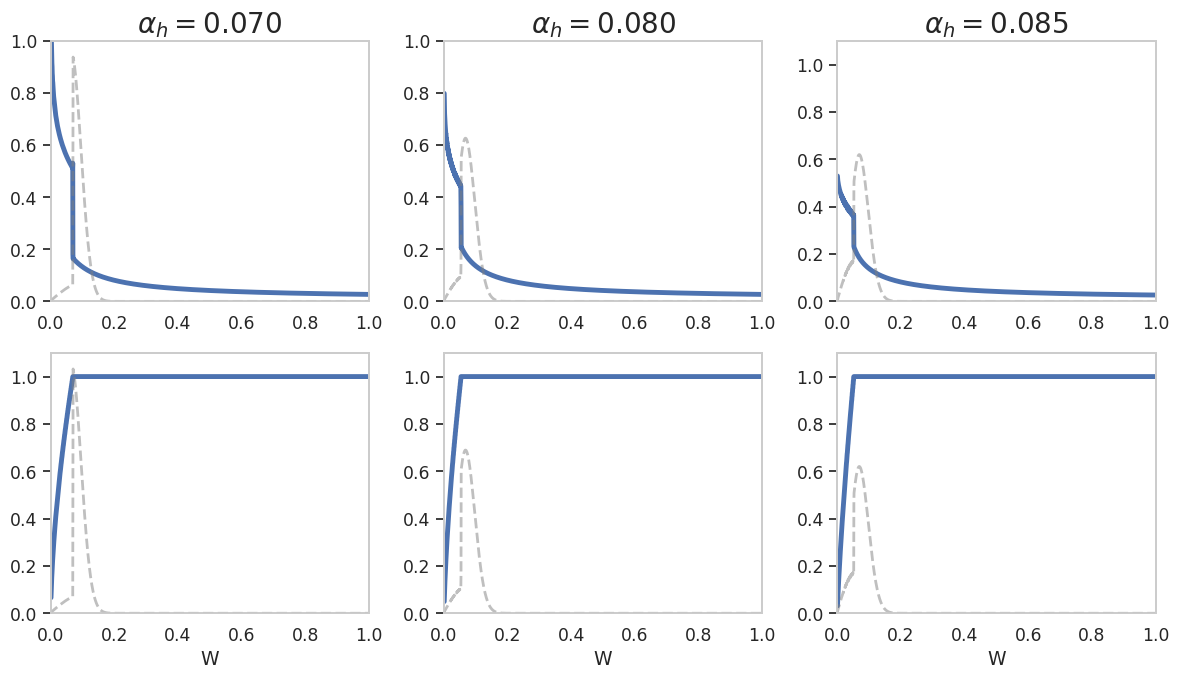

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
W = model_070_lower_triangular['W']['W'].unique()
W2 = model_070_upper_triangular['W']['W'].unique()

sns.lineplot(x = W, y = model_070_lower_triangular['PiE_final_TFP'], ax = axes[0,0])
ax2 = axes[0,0].twinx()
sns.lineplot(x = W2, y = model_070_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[0,0].set_title(r"$\alpha_h=0.070$", fontsize=20)
axes[0,0].set_ylim(0,1.0)
axes[0,0].set_xlim(0,1.0)
ax2.set_ylim([0,0.016])

sns.lineplot(x = W, y = model_080_lower_triangular['PiE_final_TFP'], ax = axes[0,1])
ax2 = axes[0,1].twinx()
sns.lineplot(x = W2, y = model_080_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[0,1].set_title(r"$\alpha_h=0.080$", fontsize=20)
axes[0,1].set_ylim(0,1.0)
axes[0,1].set_xlim(0,1.0)
ax2.set_ylim([0,0.016])

sns.lineplot(x = W, y = model_085_lower_triangular['PiE_final_TFP'], ax = axes[0,2])
ax2 = axes[0,2].twinx()
sns.lineplot(x = W2, y = model_085_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[0,2].set_title(r"$\alpha_h=0.085$", fontsize=20)
axes[0,2].set_ylim(0,1.1)
axes[0,2].set_xlim(0,1.0)
ax2.set_ylim([0,0.016])

sns.lineplot(x = W2, y = model_070_upper_triangular['kappa_final'], ax = axes[1,0])
ax2 = axes[1,0].twinx()
sns.lineplot(x = W2, y = model_070_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[1,0].set_ylim(0,1.1)
axes[1,0].set_xlim(0,1.0)
axes[1,0].set_xlabel('W')
ax2.set_ylim([0,0.016])

sns.lineplot(x = W2, y = model_080_upper_triangular['kappa_final'], ax = axes[1,1])
ax2 = axes[1,1].twinx()
sns.lineplot(x = W2, y = model_080_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[1,1].set_ylim(0,1.1)
axes[1,1].set_xlim(0,1.0)
axes[1,1].set_xlabel('W')
ax2.set_ylim([0,0.016])

sns.lineplot(x = W2, y = model_085_upper_triangular['kappa_final'], ax = axes[1,2])
ax2 = axes[1,2].twinx()
sns.lineplot(x = W2, y =  model_085_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[1,2].set_ylim(0,1.1)
axes[1,2].set_xlim(0,1.0)
axes[1,2].set_xlabel('W')
ax2.set_ylim([0,0.016])

for ax in axes.flatten():
    ax.grid(False)

plt.tight_layout()
plt.savefig("plots/figure_13.pdf")
plt.show()



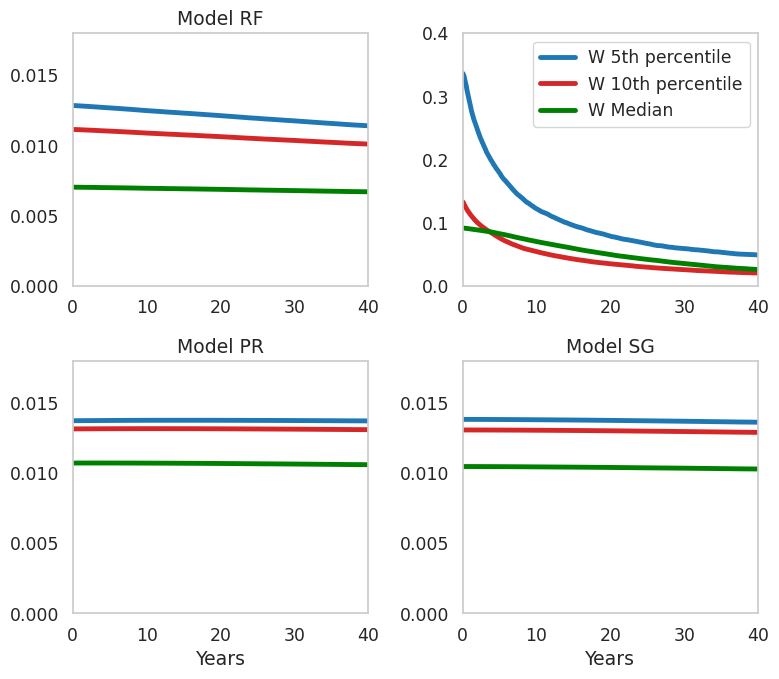

In [55]:
fig, axes = plt.subplots(2,2, figsize=(8,7))
# sns.lineplot(modelRF_lower['elasticity_logw']['exposure_elasticity'].item().firstType[0,0,:], ax = axes[0,0], color = set2_colors[0])
# sns.lineplot(modelRF_lower['elasticity_logw']['exposure_elasticity'].item().firstType[1,0,:], ax = axes[0,0], color = set2_colors[1])
# sns.lineplot(modelRF_lower['elasticity_logw']['exposure_elasticity'].item().firstType[2,0,:], ax = axes[0,0], color = set2_colors[2])

sns.lineplot(modelRF_lower['elasticities_W_percentile_005']['exposure_elasticity'], ax = axes[0,0],color = colors[0])
sns.lineplot(modelRF_lower['elasticities_W_percentile_01']['exposure_elasticity'], ax = axes[0,0],color = colors[1])
sns.lineplot(modelRF_lower['elasticities_W_percentile_05']['exposure_elasticity'], ax = axes[0,0],color = colors[2])
axes[0,0].set_title(r'Model RF')

# sns.lineplot(modelSG_lower['elasticity_logw']['exposure_elasticity'].item().firstType[0,0,:], ax = axes[1,1],color = colors[0])
# sns.lineplot(modelSG_lower['elasticity_logw']['exposure_elasticity'].item().firstType[1,0,:], ax = axes[1,1],color = colors[1])
# sns.lineplot(modelSG_lower['elasticity_logw']['exposure_elasticity'].item().firstType[2,0,:], ax = axes[1,1],color = set2_colors[2])

sns.lineplot(modelSG_lower['elasticities_W_percentile_005']['exposure_elasticity'], ax = axes[1,1],color = colors[0])
sns.lineplot(modelSG_lower['elasticities_W_percentile_01']['exposure_elasticity'], ax = axes[1,1],color = colors[1])
sns.lineplot(modelSG_lower['elasticities_W_percentile_05']['exposure_elasticity'], ax = axes[1,1],color = colors[2])
axes[1,1].set_title(r'Model SG')
axes[1,1].set_xlabel('Years')

# sns.lineplot(modelPR_lower['elasticity_logw']['exposure_elasticity'].item().firstType[0,0,:], ax = axes[2], label = '1 percentile',color = set2_colors[0],ls = '-')
# sns.lineplot(modelPR_lower['elasticity_logw']['exposure_elasticity'].item().firstType[1,0,:], ax = axes[2], label = '10 percentile',color = set2_colors[1],ls = '-')
# sns.lineplot(modelPR_lower['elasticity_logw']['exposure_elasticity'].item().firstType[2,0,:], ax = axes[2], label = '50 percentile',color = set2_colors[2],ls = '-')

sns.lineplot(modelPR_lower['elasticities_W_percentile_005']['exposure_elasticity'], ax = axes[1,0],color = colors[0])
sns.lineplot(modelPR_lower['elasticities_W_percentile_01']['exposure_elasticity'], ax = axes[1,0],color = colors[1])
sns.lineplot(modelPR_lower['elasticities_W_percentile_05']['exposure_elasticity'], ax = axes[1,0],color = colors[2])
axes[1,0].set_title(r'Model PR')
axes[1,0].set_xlabel('Years')

sns.lineplot(x=np.linspace(0,49,480), y=model_080_lower_triangular['elasticities_W0']['exposure_elasticity'], label='W 5th percentile', ls='-',color = colors[0], ax = axes[0,1])
sns.lineplot(x=np.linspace(0,49,480), y=model_080_lower_triangular['elasticities_W1']['exposure_elasticity'], label='W 10th percentile', ls='-',color = colors[1], ax=axes[0,1])
sns.lineplot(x=np.linspace(0,49,480), y=model_080_lower_triangular['elasticities_W2']['exposure_elasticity'], label='W Median', ls='-',color = colors[2], ax=axes[0,1])


for ax in axes.flatten():
    ax.set_xlim(0,40)
    ax.grid(False)
    ax.set_ylim([0,0.018])

axes[0,1].set_ylim(0,0.4)
# plt.suptitle('Experts Wealth Share Exposure Elasticities')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
fig.savefig("plots/figure_14.pdf")
plt.show()

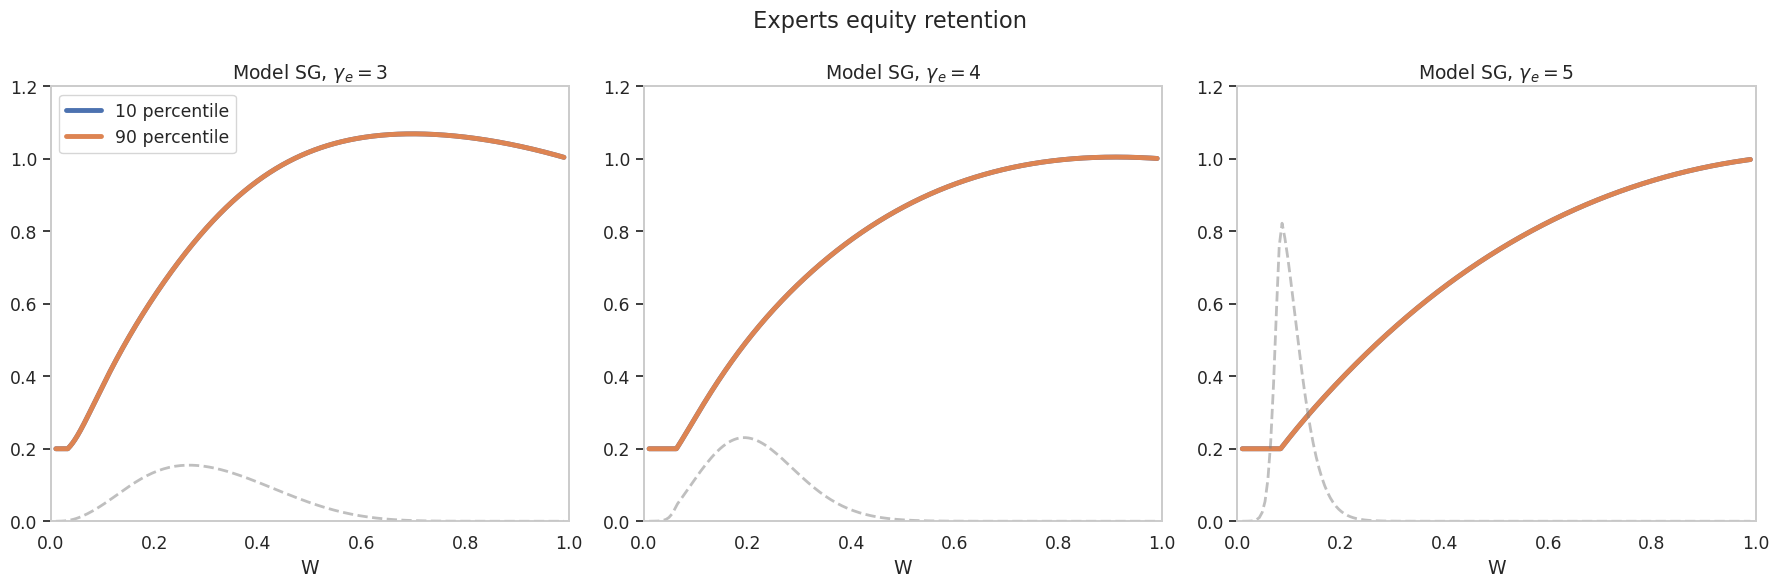

In [8]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
W_dense = np.unique(modelSG_lower['eva_V_10']['W'])
W_sparse = np.unique(modelSG_lower['W'].values)
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_3['eva_V_10']['chi_NN'][:,0], ax = axes[0], label = '10 percentile')
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_3['eva_V_90']['chi_NN'][:,0], ax = axes[0], label = '90 percentile')
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[0].set_title(r'Model SG, $\gamma_e = 3$')

sns.lineplot(x = W_dense, y = modelSG_lower['eva_V_10']['chi_NN'][:,0], ax = axes[1])
sns.lineplot(x = W_dense, y = modelSG_lower['eva_V_90']['chi_NN'][:,0], ax = axes[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[1].set_title(r'Model SG, $\gamma_e = 4$')

sns.lineplot(x = W_dense, y = modelSG_lower_gammae_5['eva_V_10']['chi_NN'][:,0], ax = axes[2])
sns.lineplot(x = W_dense, y = modelSG_lower_gammae_5['eva_V_90']['chi_NN'][:,0], ax = axes[2])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelSG_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[2].set_title(r'Model SG, $\gamma_e = 5$')

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.2])
    ax.set_xlabel('W')
plt.suptitle('Experts equity retention')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

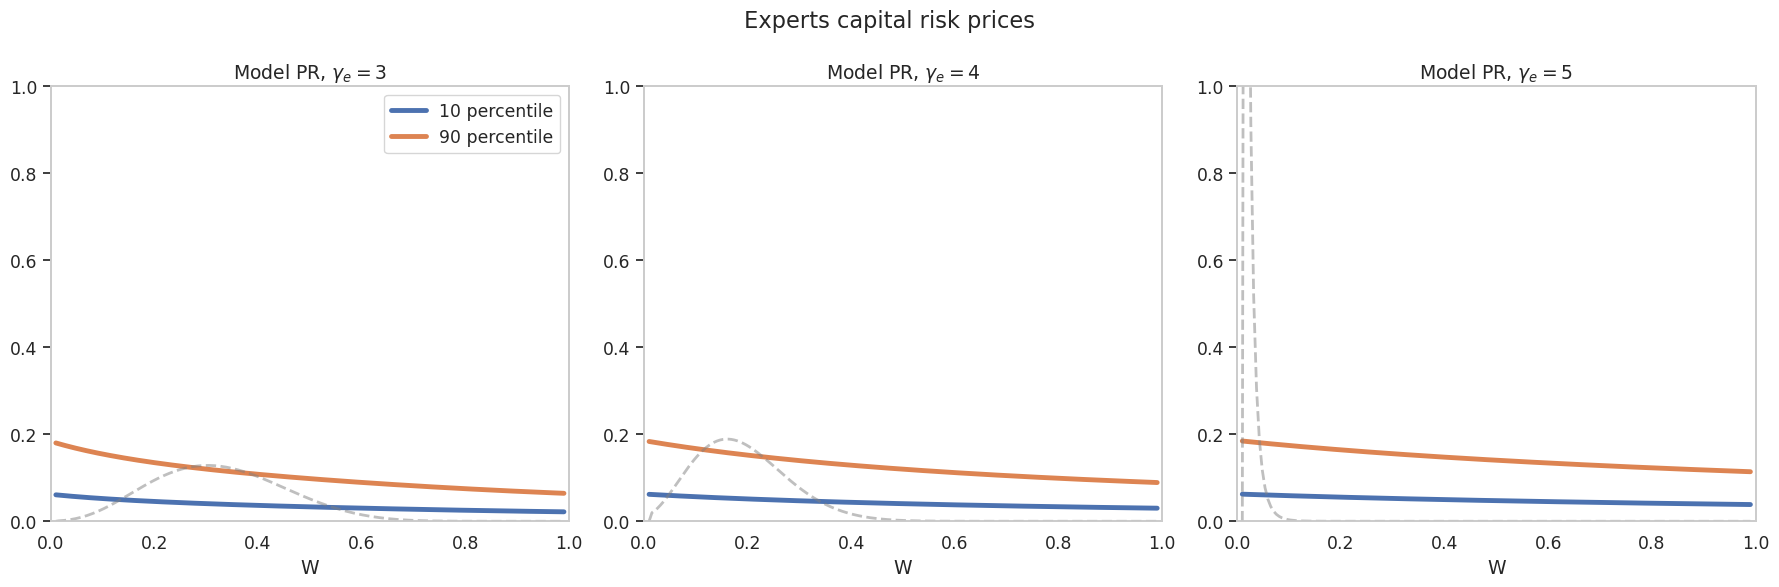

In [9]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
W_dense = np.unique(modelPR_lower['eva_V_10']['W'])
W_sparse = np.unique(modelPR_lower['W'].values)
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_3['eva_V_10']['PiE_NN'][:,0], ax = axes[0], label = '10 percentile')
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_3['eva_V_90']['PiE_NN'][:,0], ax = axes[0], label = '90 percentile')
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[0].set_title(r'Model PR, $\gamma_e = 3$')

sns.lineplot(x = W_dense, y = modelPR_lower['eva_V_10']['PiE_NN'][:,0], ax = axes[1])
sns.lineplot(x = W_dense, y = modelPR_lower['eva_V_90']['PiE_NN'][:,0], ax = axes[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[1].set_title(r'Model PR, $\gamma_e = 4$')

sns.lineplot(x = W_dense, y = modelPR_lower_gammae_5['eva_V_10']['PiE_NN'][:,0], ax = axes[2])
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_5['eva_V_90']['PiE_NN'][:,0], ax = axes[2])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[2].set_title(r'Model PR, $\gamma_e = 5$')

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.0])
    ax.set_xlabel('W')
plt.suptitle('Experts capital risk prices')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

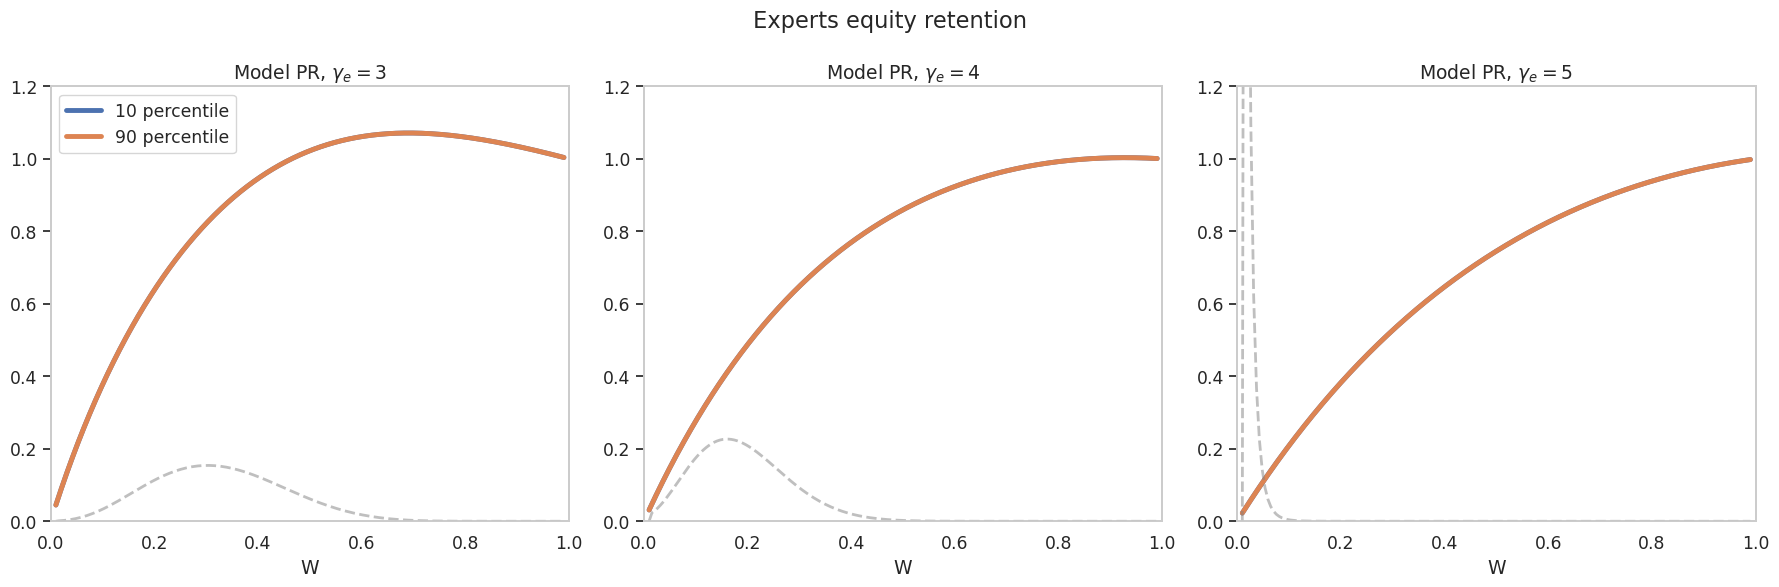

In [10]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
W_dense = np.unique(modelPR_lower['eva_V_10']['W'])
W_sparse = np.unique(modelPR_lower['W'].values)
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_3['eva_V_10']['chi_NN'][:,0], ax = axes[0], label = '10 percentile')
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_3['eva_V_90']['chi_NN'][:,0], ax = axes[0], label = '90 percentile')
axes[0].legend()
ax2 = axes[0].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_3['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[0].set_title(r'Model PR, $\gamma_e = 3$')

sns.lineplot(x = W_dense, y = modelPR_lower['eva_V_10']['chi_NN'][:,0], ax = axes[1])
sns.lineplot(x = W_dense, y = modelPR_lower['eva_V_90']['chi_NN'][:,0], ax = axes[1])
ax2 = axes[1].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[1].set_title(r'Model PR, $\gamma_e = 4$')

sns.lineplot(x = W_dense, y = modelPR_lower_gammae_5['eva_V_10']['chi_NN'][:,0], ax = axes[2])
sns.lineplot(x = W_dense, y = modelPR_lower_gammae_5['eva_V_90']['chi_NN'][:,0], ax = axes[2])
ax2 = axes[2].twinx()
sns.lineplot(x = W_sparse, y = modelPR_lower_gammae_5['dentW'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylim([0,0.13])
axes[2].set_title(r'Model PR, $\gamma_e = 5$')

for ax in axes.flatten():
    ax.set_xlim(0,1.0)
    ax.grid(False)
    ax.set_ylim([0.0,1.2])
    ax.set_xlabel('W')
plt.suptitle('Experts equity retention')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

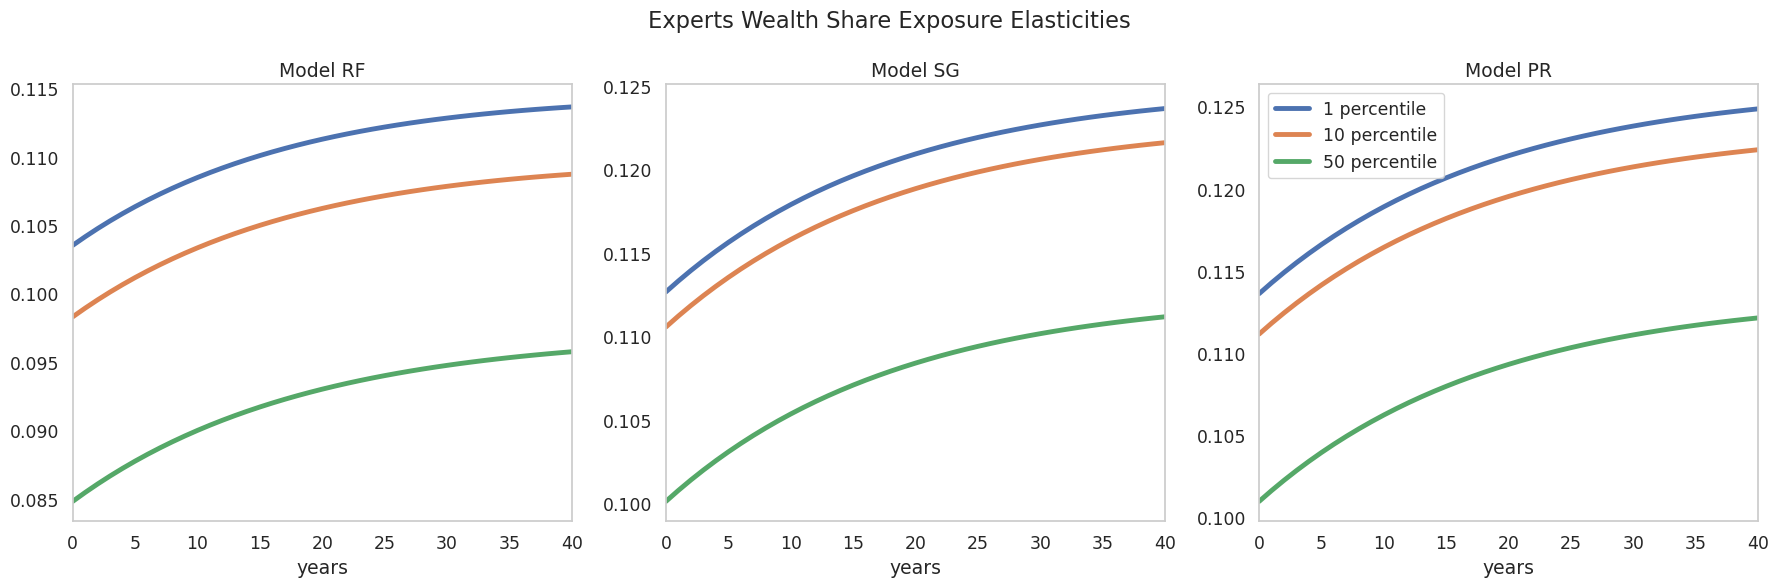

In [13]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
sns.lineplot(modelRF_lower['elasticity_logw']['price_elasticity'].item().firstType[0,0,:], ax = axes[0])
sns.lineplot(modelRF_lower['elasticity_logw']['price_elasticity'].item().firstType[1,0,:], ax = axes[0])
sns.lineplot(modelRF_lower['elasticity_logw']['price_elasticity'].item().firstType[2,0,:], ax = axes[0])
axes[0].set_title(r'Model RF')

sns.lineplot(modelSG_lower['elasticity_logw']['price_elasticity'].item().firstType[0,0,:], ax = axes[1])
sns.lineplot(modelSG_lower['elasticity_logw']['price_elasticity'].item().firstType[1,0,:], ax = axes[1])
sns.lineplot(modelSG_lower['elasticity_logw']['price_elasticity'].item().firstType[2,0,:], ax = axes[1])
axes[1].set_title(r'Model SG')

sns.lineplot(modelPR_lower['elasticity_logw']['price_elasticity'].item().firstType[0,0,:], ax = axes[2], label = '1 percentile')
sns.lineplot(modelPR_lower['elasticity_logw']['price_elasticity'].item().firstType[1,0,:], ax = axes[2], label = '10 percentile')
sns.lineplot(modelPR_lower['elasticity_logw']['price_elasticity'].item().firstType[2,0,:], ax = axes[2], label = '50 percentile')
axes[2].set_title(r'Model PR')

for ax in axes.flatten():
    ax.set_xlim(0,40)
    ax.grid(False)
    # ax.set_ylim([0,0.03])
    ax.set_xlabel('years')
plt.suptitle('Experts Wealth Share Exposure Elasticities')  

plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

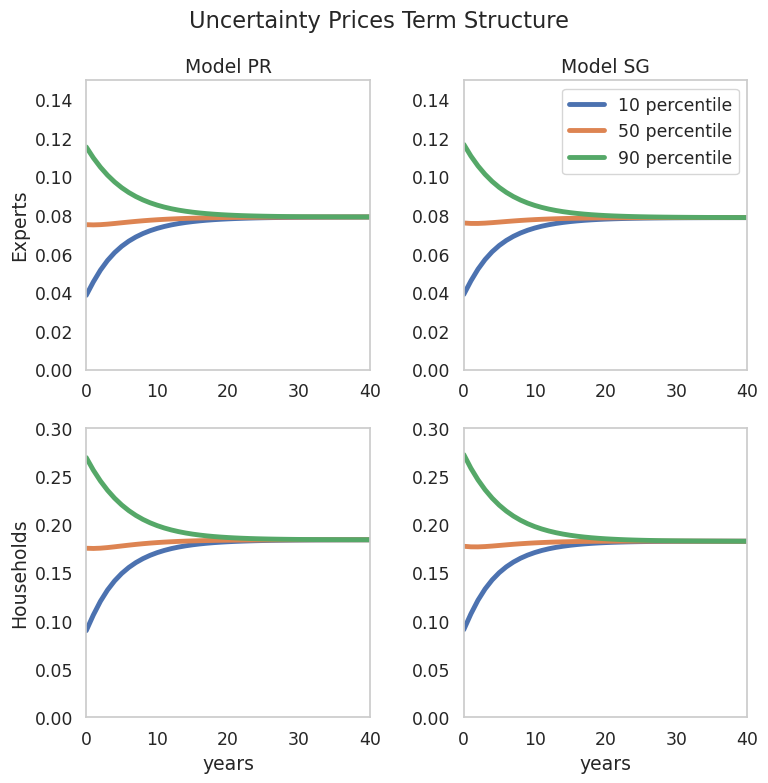

In [14]:
fig, axes = plt.subplots(2,2, figsize=(8, 8))
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[0,0])
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[0,0])
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[0,0])
axes[0,0].set_title("Model PR")
axes[0,0].set_ylabel("Experts")
axes[0,0].set_ylim([0,0.15])

sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[0,1], label = '10 percentile')
sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[0,1], label = '50 percentile')
sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[0,1], label = '90 percentile')
axes[0,1].set_title("Model SG")
axes[0,1].set_ylim([0,0.15])

sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[1,0])
sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[1,0])
sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[1,0])
axes[1,0].set_ylabel("Households")
axes[1,0].set_xlabel("years")
axes[1,0].set_ylim([0,0.3])

sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[1,1])
sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[1,1])
sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[1,1])
axes[1,1].set_xlabel("years")
axes[1,1].set_ylim([0,0.3])

for ax in axes.flatten():
    ax.set_xlim(0,40)
    ax.grid(False)

plt.suptitle('Uncertainty Prices Term Structure')
plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()


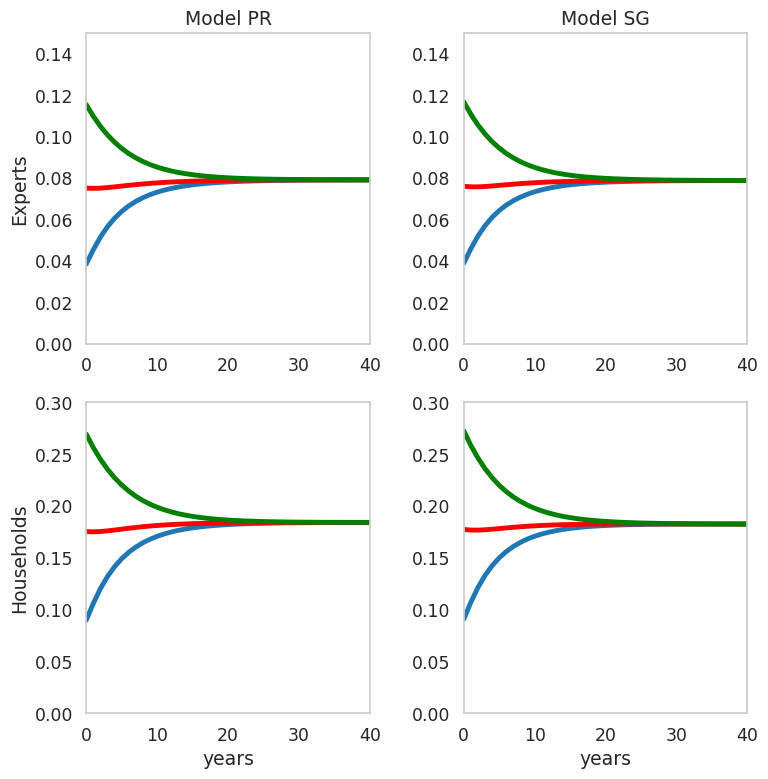

In [14]:
fig, axes = plt.subplots(2,2, figsize=(8, 8))
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[0,0],color='#1f77b4')
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[0,0],color='red')
sns.lineplot(modelPR_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[0,0],color='green')
axes[0,0].set_title("Model PR")
axes[0,0].set_ylabel("Experts")
axes[0,0].set_ylim([0,0.15])

sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[0,1],color='#1f77b4')
sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[0,1],color='red')
sns.lineplot(modelSG_upper['uncertaintye_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[0,1],color='green')
axes[0,1].set_title("Model SG")
axes[0,1].set_ylim([0,0.15])

sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[1,0],color='#1f77b4')
sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[1,0],color='red')
sns.lineplot(modelPR_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[1,0],color='green')
axes[1,0].set_ylabel("Households")
axes[1,0].set_xlabel("years")
axes[1,0].set_ylim([0,0.3])

sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[0,1,:], ax = axes[1,1],color='#1f77b4')
sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[1,1,:], ax = axes[1,1],color='red')
sns.lineplot(modelSG_upper['uncertaintyh_priceelas']['price_elasticity'].item().secondType[2,1,:], ax = axes[1,1],color='green')
axes[1,1].set_xlabel("years")
axes[1,1].set_ylim([0,0.3])

for ax in axes.flatten():
    ax.set_xlim(0,40)
    ax.grid(False)

# plt.suptitle('Uncertainty Prices Term Structure')
plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()
